# Unit testing

In [1]:
!python test_transport_simulation.py

Registering <function TransportSimulation.get_free_N_to_free_C at 0x7f9d50413158>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7f9d50412ea0>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7f9d50412d08>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7f9d50412d90>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7f9d50412e18>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7f9d50413378>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7f9d50412f28>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7f9d504132f0>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7f9d50412bf8>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7f9d50413268>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7f9d504131e0>
Registering <function Tran

# Model variables - legend:

complexL/U - importin-cargo complex, labeled (L) or unlabeled (U) 

freeL/U - free cargo, labeled (L) or unlabeled (U) 

c - concentration

v - volume

C - cytoplasm

N - nucleues

NPC - nuclear pore complex

nmol - number of molecules

M - molar (moles per liter)

L - liter

fL - femtoliter


In [2]:
import importlib
import transport_simulation
from transport_simulation import TransportSimulation
importlib.reload(transport_simulation)
import transport_simulation
from transport_simulation import TransportSimulation


Registering <function TransportSimulation.get_free_N_to_free_C at 0x7f8dc0681c80>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7f8dc0681a60>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7f8dc06818c8>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7f8dc0681950>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7f8dc06819d8>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7f8dc0681ea0>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7f8dc0681ae8>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7f8dc0681e18>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7f8dc06817b8>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7f8dc0681d90>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7f8dc0681d08>
Registering <function Tran

# Simulation main code

In [9]:
from matplotlib import pyplot as plt
import numpy as np

def time_series(sim_time_sec, attributes, n_skip=10, dt_sec=1e-3, **kwargs):
  '''
  TODO
  '''
  ts= TransportSimulation(**kwargs)
  ts.bleach_start_time_sec= 100.0
  ts.dt_sec= dt_sec
  n= int(np.ceil(sim_time_sec / ts.dt_sec))
  print(f"Running for n={n} time steps")
  n_frames= int(np.floor(n/n_skip)) + 1 
  c_arrs = {attr: np.zeros(n_frames) for attr in attributes}
  i_frame= 0
  print("Cargo before: {}".format(ts.get_total_cargo_nmol()))
  for i in range(n):
    ts.do_one_time_step()
    if (i % n_skip) == 0:
      for attr in attributes:
        c_arrs[attr][i_frame] = ts.get_nmol(attr)
      i_frame += 1
  print("Cargo after: {}".format(ts.get_total_cargo_nmol()))
  return c_arrs


def plot_simulation_attributes(sim_time_sec, 
                               attributes_list, 
                               dt_sec,
                               n_skip=10, 
                               log=True, 
                               **kwargs):
  def merge_lists(lists):
      return [x for y in lists for x in y]
  attributes= merge_lists(attributes_list)
  assert(len(attributes) == sum([len(x) for x in attributes_list]))
  c = time_series(sim_time_sec, 
                  attributes, 
                  n_skip= n_skip,
                  dt_sec= dt_sec,
                  **kwargs)
  fig, axes= plt.subplots(len(attributes_list),
                          1, 
                          figsize=(10,15), 
                          squeeze= False)
  for cur_attributes, ax in zip(attributes_list, axes[:,0]):
      print(cur_attributes)
      for attr in cur_attributes:
        cur_c= c[attr]
        n_frames= len(cur_c)
        x = np.arange(n_frames) * sim_time_sec / n_frames
        ax.plot(x, cur_c, label=attr)
      if log:
        ax.set_yscale('log')
      ax.set_xlabel("time [sec]")
      ax.set_ylabel("nmol")
      ax.legend()
      if is_log:
        ylim= ax.get_ylim()
        ylim= (10.0, ylim[1])
        ax.set_ylim(ylim)
  return axes, x, c


In [10]:
sim_time_sec= 150.0
RAN_attributes = ['GDP_N', 'GDP_C', 'GTP_N', 'GTP_C']
cargoL_attributes= ['complexL_NPC_C_import', 'complexL_NPC_C_export',
                    'complexL_NPC_N_import', 'complexL_NPC_N_export',
                    'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']
cargoU_attributes= ['complexU_NPC_C_import', 'complexU_NPC_C_export', 
                    'complexU_NPC_N_import', 'complexU_NPC_N_export',
                    'freeU_N', 'freeU_C', 'complexU_C', 'complexU_N']
c_attributes = ["c_C_M", "c_C_M"]
b_attributes = ['fraction_C_b', "c_C_M", ]
npc_attributes = ['nmol_NPC']
dock_attributes = ['c_C_M', 'fraction_C_b', 'nmol_NPC', 'NPC_dock_capacity']

 

Running for n=150000 time steps
Cargo before: 1681643.5000000002
Cargo after: 1681643.9263523289
['GDP_N', 'GDP_C', 'GTP_N', 'GTP_C']
['complexL_NPC_C_import', 'complexL_NPC_C_export', 'complexL_NPC_N_import', 'complexL_NPC_N_export', 'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']
['complexU_NPC_C_import', 'complexU_NPC_C_export', 'complexU_NPC_N_import', 'complexU_NPC_N_export', 'freeU_N', 'freeU_C', 'complexU_C', 'complexU_N']


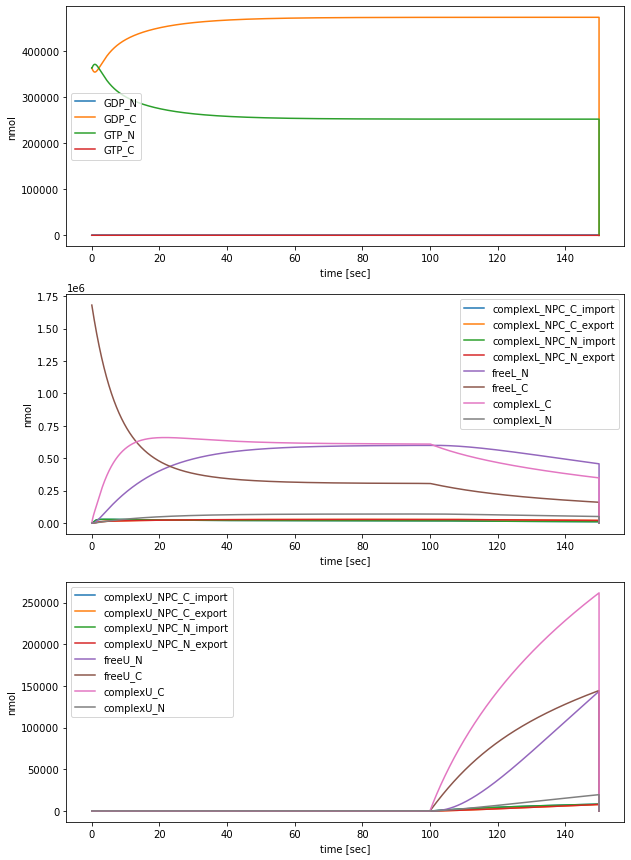

In [11]:
is_log= False
sim_flags= dict()#rate_free_to_complex_per_sec=1.0,
                #max_passive_diffusion_rate_nmol_per_sec_per_M=2e7)
ax, x, c= plot_simulation_attributes(sim_time_sec, 
                           [ RAN_attributes, 
                             cargoL_attributes, 
                             cargoU_attributes ],
                            log= is_log,
                            dt_sec=1e-3,
                            **sim_flags)

Running for n=150000 time steps
Cargo before: 1681643.5000000002
Cargo after: 1681643.845636874
['complexL_NPC_C_import', 'complexL_NPC_C_export', 'complexL_NPC_N_import', 'complexL_NPC_N_export', 'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']
Running for n=150000 time steps
Cargo before: 1681643.5000000002
Cargo after: 1681643.9263523289
['complexL_NPC_C_import', 'complexL_NPC_C_export', 'complexL_NPC_N_import', 'complexL_NPC_N_export', 'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']


Text(0.5, 1.0, 'normal GDP_N to GTP_N rate')

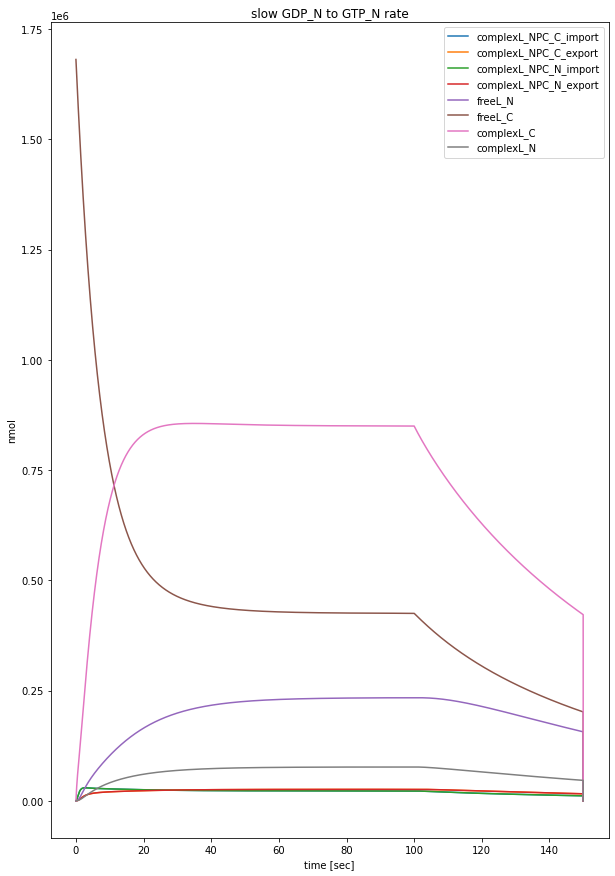

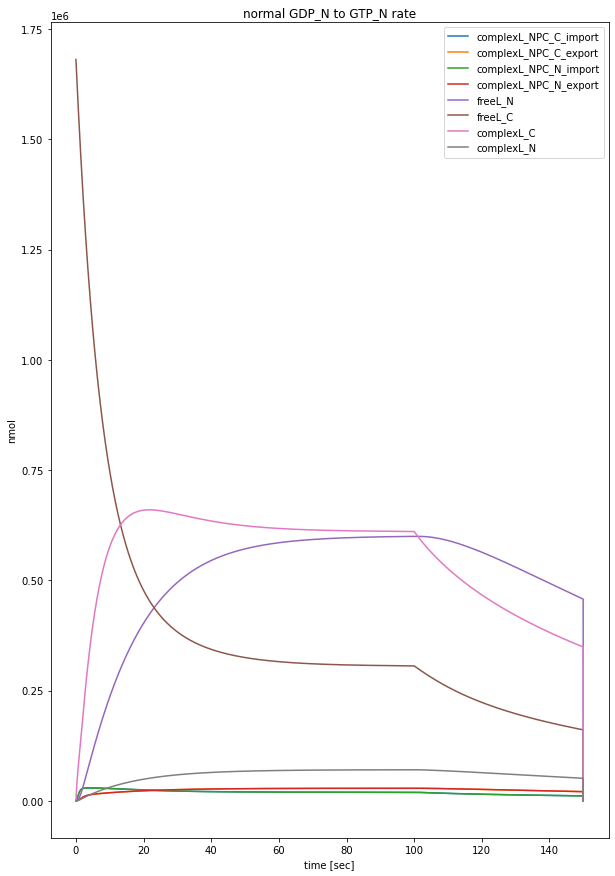

In [6]:

#fig, ax = plt.subplots(1, 3,figsize=(40,5))
axes0, x, c_1 = plot_simulation_attributes(sim_time_sec, 
                                   [cargoL_attributes], 
                                   log= is_log, rate_GDP_N_to_GTP_N_per_sec=0.2,
                                  dt_sec= 1e-3)
axes0[0,0].set_title("slow GDP_N to GTP_N rate")
axes1, x, c_2 = plot_simulation_attributes(sim_time_sec, [cargoL_attributes], 
                                   log= is_log,
                                  dt_sec= 1e-3)
axes1[0,0].set_title("normal GDP_N to GTP_N rate")
#fig, ax2= plt.subplots(1,1)
#ax2.plot(c_1[-1], label='rate_GDP_N_to_GTP_N_per_sec=0.2')
#ax2.plot(c_2[-1], label='rate_GDP_N_to_GTP_N_per_sec=200.0')
#ax2.set_title("complexL_N")
#ax2.legend()

## Map parameters phasespace of transport

In [7]:
import map_param_grid
importlib.reload(map_param_grid)

<module 'map_param_grid' from '/Volumes/GoogleDrive/My Drive/Projects/PereIon_NPC_FLIP/git_npctransport_kinetic/map_param_grid.py'>

### Run:

In [8]:
def get_param_range_D_kon(nx, ny):
    param_range= {}
    print(f"nx={nx} ny={ny}")
    epsilon = 1e-9
    c_cargo_M= 50e-6 # TODO: fetch this from the simulation
    param_range['tag_x']= "max_passive_diffusion_rate_nmol_per_sec_per_M"
    param_range['range_x']= np.logspace(2, 5, nx) / c_cargo_M # divided by 50E-6 to normalize by the initial cargo concentration # TODO: take the actual cargo concentration?
    param_range['pretty_x']= r"passive diffusion rate [$s^{-1} M^{-1}$]"
    param_range['tag_y']= "rate_free_to_complex_per_sec"
    param_range['range_y']= np.logspace(-3, 0, ny)
    param_range['pretty_y']= r"NTR $k_{on}$ [$sec^{-1}$]"
    return param_range


In [9]:
import multiprocessing
n_processors= multiprocessing.cpu_count()
param_range= get_param_range_D_kon(nx= 8, ny= 6)
stats_grids, ts= map_param_grid.map_param_grid_parallel( param_range,
                                      equilibration_time_sec= 100.0,
                                      n_processors= n_processors-2)


nx=8 ny=6
Param max_passive_diffusion_rate_nmol_per_sec_per_M default value is 20000
Param rate_free_to_complex_per_sec default value is 0.1
njobs=48


[1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10 1.e+11]
[1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10 1.e+11]
[1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10 1.e+11]
[1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10 1.e+11]
[1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10 1.e+11]
[1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10 1.e+11]


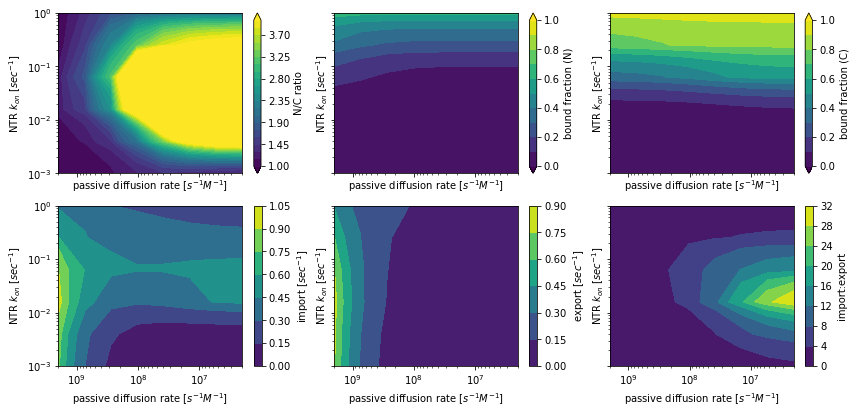

In [10]:
ts= map_param_grid.get_new_transport_simulation()
fig, axes= plt.subplots(2,3, figsize=(14, 6.5), sharex=True, sharey=True)
# N/C
plt.sca(axes[0,0])
map_param_grid.plot_NC_ratios(param_range, stats_grids, ts)
# Bound fraction
map_param_grid.plot_bound_fraction(param_range, stats_grids, 
                                   'N', ax=axes[0,1])
map_param_grid.plot_bound_fraction(param_range, stats_grids, 
                                   'C', ax=axes[0,2])
# Import/export
map_param_grid.plot_import_export(param_range,
                                  stats_grids,
                                  axes=[axes[1,0], axes[1,1]])
plt.sca(axes[1,2])
ratios_import_export= map_param_grid.get_import_export_ratios(stats_grids)
map_param_grid.plot_param_grid(param_range, 
                ratios_import_export,
                Z_label= 'import:export')

## map traverse

In [114]:
import map_param_grid
import transport_simulation
importlib.reload(map_param_grid)
importlib.reload(transport_simulation)

def get_param_range_traverse_kon(nx, ny):
    param_range= {}
    print(f"nx={nx} ny={ny}")
    epsilon = 1e-9
    c_cargo_M= 50e-6 # TODO: fetch this from the simulation
    param_range['tag_x']= "fraction_complex_NPC_traverse_per_sec"
    param_range['range_x']= np.logspace(-2, 2, nx) # divided by 50E-6 to normalize by the initial cargo concentration # TODO: take the actual cargo concentration?
    param_range['pretty_x']= r"rate NPC traverse [$sec^{-1}$]"
    param_range['tag_y']= "rate_free_to_complex_per_sec"
    param_range['range_y']= np.logspace(-3, 2, ny)
    param_range['pretty_y']= r"NTR $k_{on}$ [$sec^{-1}$]"
    return param_range

Registering <function TransportSimulation.get_free_N_to_free_C at 0x7fc4affc3048>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7fc58017ed90>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7fc58017ebf8>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7fc58017ec80>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7fc58017ed08>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7fc4affc3268>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7fc58017ee18>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7fc4affc31e0>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7fc58017eae8>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7fc4affc3158>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7fc4affc30d0>
Registering <function Tran

In [115]:
def my_transport_simulation(**kwargs):
    ts= transport_simulation.TransportSimulation(**kwargs)      
    ts.set_time_step(1e-3)
    ts.set_passive_nuclear_molar_rate_per_sec(0.08) #get_passive_export_rate_per_sec(27,1))
    return ts
test_ts= my_transport_simulation()
print(test_ts.max_passive_diffusion_rate_nmol_per_sec_per_M)

209565600.00000003


In [ ]:
param_range= get_param_range_traverse_kon(nx= 10, ny= 10)
print(param_range)
n_processors= multiprocessing.cpu_count()
stats_grids_traverse, ts= map_param_grid.map_param_grid_parallel( param_range,
                                      equilibration_time_sec= 100.0,
                                      n_processors= n_processors-2,
                                                   transport_simulation_generator= my_transport_simulation)

nx=10 ny=10
{'tag_x': 'fraction_complex_NPC_traverse_per_sec', 'range_x': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]), 'pretty_x': 'rate NPC traverse [$sec^{-1}$]', 'tag_y': 'rate_free_to_complex_per_sec', 'range_y': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]), 'pretty_y': 'NTR $k_{on}$ [$sec^{-1}$]'}
Param fraction_complex_NPC_traverse_per_sec default value is 10000000.0
Param rate_free_to_complex_per_sec default value is 0.1
njobs=100


In [ ]:
importlib.reload(map_param_grid)
NC_max= 5.0
fig, axes= plt.subplots(2,3, figsize=(14, 6.5), sharex=True, sharey=True)
# N/C
plt.sca(axes[0,0])
map_param_grid.plot_NC_ratios(param_range, stats_grids_traverse, ts, 
                              vmax= NC_makx)
# Bound fraction
map_param_grid.plot_bound_fraction(param_range, stats_grids_traverse, 
                                   'N', ax=axes[0,1])
map_param_grid.plot_bound_fraction(param_range, stats_grids_traverse, 
                                   'C', ax=axes[0,2])
# Import/export
map_param_grid.plot_import_export(param_range,
                                  stats_grids_traverse,
                                  axes=[axes[1,0], axes[1,1]],
                               vmin=0.0,
                               vmax=0.3,
                levels=np.linspace(0,0.3,16),
                                 extend='both')
plt.sca(axes[1,2])
ratios_import_export= map_param_grid.get_import_export_ratios(stats_grids_traverse)
map_param_grid.plot_param_grid(param_range, 
                ratios_import_export,
                Z_label= 'import:export',
                              vmax=NC_max)

# Map NLS strength, MW size, force

In [29]:
import importlib
import transport_simulation
from transport_simulation import TransportSimulation
importlib.reload(transport_simulation)
import transport_simulation
from transport_simulation import TransportSimulation

import numpy as np
import transport_simulation

def get_ts_with_parameters(MW= 27, 
                      NLS_strength= 0, 
                      is_force= False, 
                      **kwargs):
    ts = TransportSimulation(**kwargs)
    ts.set_passive_nuclear_molar_rate_per_sec(
        get_passive_nuclear_molar_rate_per_sec(MW, is_force))
    ts.set_params(rate_free_to_complex_per_sec= 
                  get_free_to_complex_rate(NLS_strength))
    ts.set_params(fraction_complex_NPC_traverse_per_sec=
                  get_fraction_complex_NPC_traverse_per_sec(MW, is_force))
    return ts

def get_free_to_complex_rate(NLS_strength):
    rates = [0.0,
             0.001,
             0.0025, #0.07
             0.005,
             0.01,
             0.025,
             0.05, #2.11
             0.1,  #16.4
             0.25
            ]
    return rates[NLS_strength]

def get_passive_nuclear_molar_rate_per_sec(MW, is_force): # TODO: verify it corresponds to multiplyng by concentration rather than nmolecules
    #TODO: generalize this - either from the literature or regression
    base_rates={ 27:0.07624291, 
                41:0.0560286, 
                54:0.03452787, 
                67:0.03022162 }
    rate= base_rates[MW]
    if is_force:
        rate += get_force_effect_on_diffusion(MW)
    return rate

def get_force_effect_on_diffusion(MW):
    """
    The effect of force on passive diffusion as measured by experiment
    """
    effects = {27:0.08698999,
               41:0.03395035,
               54:-0.00019152,
               67:0.00177338}
    return effects[MW]

def get_fraction_complex_NPC_traverse_per_sec(MW, is_force):
    s= 2.5
    rate= { 27: [s*1.5e-1,  s*3.0e-1],
            41: [s*1.2e-1,  s*2.4e-1],
            54: [s*1.15e-1, s*2.4e-1],
            67: [s*1.3e-1,  s*2.1e-1] }
    i_force= 1 if is_force else 0
    return rate[MW][i_force]


Registering <function TransportSimulation.get_free_N_to_free_C at 0x7fc4f3fa2bf8>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7fc55094a378>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7fc55094ac80>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7fc55094aae8>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7fc55094a620>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7fc4f3fa2f28>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7fc55094a9d8>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7fc4f3fa2400>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7fc55094aa60>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7fc4f3fa2268>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7fc4f3fa2d90>
Registering <function Tran

In [30]:
def get_compartment_nmol_stats(ts, 
                               stats, 
                               compartment,
                              labels= ['L', 'U']):
    assert(compartment in ['N','C', 'NPC'])
    nframes= len(stats['time_sec'])
    nmol_stats= np.zeros(nframes)
    if compartment=='NPC':
        for label in labels:
            for side in ['N', 'C']:
                for source in ['import', 'export']:
                    tag= 'complex{}_NPC_{}_{}'.format(label,
                                                     side,
                                                     source)
                    nmol_stats = nmol_stats + stats[tag]
    else:
        for state in ['free','complex']:
            for label in labels:
                tag= '{}{}_{}'.format(state, 
                                      label, 
                                      compartment)
                nmol_stats = nmol_stats + stats[tag]
    return nmol_stats

def get_compartment_concentration_stats(ts, 
                                        stats, 
                                        compartment, 
                                       labels= ['L', 'U']):
    assert(compartment in ['N','C'])
    nmol_stats= get_compartment_nmol_stats(ts, 
                                           stats, 
                                           compartment,
                                           labels)
    is_nuclear= (compartment=='N')
    volume_L= (ts.get_v_N_L() if is_nuclear else ts.get_v_C_L())
    return (nmol_stats/transport_simulation.N_A)/volume_L

def get_N_C_ratio_stats(ts, 
                        stats,
                        labels= ['L','U']):
    EPSILON= 1E-12
    c_N_stats= get_compartment_concentration_stats(ts, 
                                                   stats, 
                                                   'N')
    c_C_stats= get_compartment_concentration_stats(ts, 
                                                   stats, 
                                                   'C')
    return c_N_stats/c_C_stats

In [107]:
import matplotlib.pyplot as plt
import multiprocessing

n_processors= 10

def do_simulate(ts, simulation_time_sec):
    return ts.simulate(simulation_time_sec)

def get_MW_stats_list_by_force(MW):
    assert(MW in [27,41, 54, 67])
    simulation_time_sec= 75
    stats_list_by_force= {}
    TSs_by_force= {}
    for is_force in [False, True]:
        TS_tuples= []
        for i_NLS in range(9):
            ts = get_ts_with_parameters(MW= MW,
                                    NLS_strength=i_NLS,
                                  is_force= is_force)
            ts.set_params(dt_sec=1e-3)
#            ts.Ran_cell_M= 100e-6 # NOTE
            ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 0.1e+6 # TODO: this is doubled relative to complex_N to free_N
            ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 0.1e+6
#            ts.fraction_complex_NPC_to_complex_N_C_per_sec= 0.1 # NOTE
            TS_tuples.append((ts, simulation_time_sec))
        pool= multiprocessing.Pool(processes= n_processors)
        stats_list_by_force[is_force]= pool.starmap(do_simulate,
                                                    TS_tuples)
        TSs_by_force[is_force]= [x[0] for x in TS_tuples]
        print(f"Is force {is_force} i_NLS {i_NLS}: OK")
    return (stats_list_by_force, TSs_by_force)

def plot_MW_stats_list(stats_list_by_force, TSs_by_force):
    plot_from_sec=  0.1 # ts.bleach_start_time_sec + 1.0
    extras= ['GTP_N',
            'GDP_N',
            'GTP_C',
            'GDP_C',
            'complexL_C',
            'freeL_C',
            'complexL_N',
            'freeL_N']
    fig, ax_grid= plt.subplots(7+len(extras), 2, 
                               figsize=(10,15+3*len(extras)), 
                               sharex=True, sharey='row')
    ax_grid= ax_grid.transpose()
    for axes, is_force in zip(ax_grid, [False, True]):  
        for i_NLS, stats in enumerate(stats_list_by_force[is_force]):
            ts= TSs_by_force[is_force][i_NLS]
            labels= ['L', 'U']
            x= stats['time_sec']
            ys={}
            ys[0]= stats['nuclear_importL_per_sec'] + stats['nuclear_importU_per_sec']
            ys[1]= stats['nuclear_exportL_per_sec'] + stats['nuclear_exportU_per_sec']
            ys[2]= get_N_C_ratio_stats(ts,
                                       stats, 
                                       labels)
            ys[3]= get_compartment_concentration_stats(ts, 
                                                      stats, 
                                                      'C', 
                                                      labels)
            ys[4]= get_compartment_concentration_stats(ts, 
                                                      stats, 
                                                      'N', 
                                                      labels)
            ys[5]= ys[3] - ys[4]
            ys[6]= stats['complexL_NPC_N_import']+stats['complexL_NPC_C_import']+stats['complexL_NPC_N_export']+stats['complexL_NPC_C_export'] \
                + stats['complexU_NPC_C_import']+stats['complexU_NPC_C_import']+stats['complexU_NPC_N_export']+stats['complexU_NPC_C_export']
            for iextra, extra in enumerate(extras):
                ys[7+iextra]= stats[extra]
            plot_from_frame= int(plot_from_sec/ts.dt_sec) 
            for j, ax in enumerate(axes):
                ax.plot(x[plot_from_frame:], 
                        ys[j][plot_from_frame:],
                        label= get_free_to_complex_rate(i_NLS))
                ax.set_xlabel(r"time [$sec$]")           
            axes[0].set_ylabel(r"import rate [$sec^{-1}$]")
            axes[1].set_ylabel(r"export rate [$sec^{-1}$]")
            axes[2].set_ylabel("N/C ratio")
            axes[3].set_ylabel(r"C [$M$]")
            axes[4].set_ylabel(r"N [$M$]")
            axes[5].set_ylabel(r"$\Delta$(C,N) [$M$]")
            axes[6].set_ylabel('NPC [nmol]')
            for iextra, extra in enumerate(extras):
                axes[7+iextra].set_ylabel(extra)
                axes[7+iextra].set_yscale('log')
            axes[3].set_yscale('log')
            axes[4].set_yscale('log')
            axes[5].set_yscale('symlog', linthreshy=1e-9)
            title= "30 kPa" if is_force else "5 kPa"
            axes[0].set_title(title)
    handles, labels = plt.gca().get_legend_handles_labels()
    lh= fig.legend(handles, labels, loc='center right')
    lh.set_title('NLS_strength')

In [92]:
MW_to_stats_list_by_force= {}            
for MW in [27, 41, 54, 67]:
    print(MW)
    MW_to_stats_list_by_force[MW]= get_MW_stats_list_by_force(MW)
  

27
Is force False i_NLS 8: OK
Is force True i_NLS 8: OK
41
Is force False i_NLS 8: OK
Is force True i_NLS 8: OK
54
Is force False i_NLS 8: OK
Is force True i_NLS 8: OK
67
Is force False i_NLS 8: OK
Is force True i_NLS 8: OK


27


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


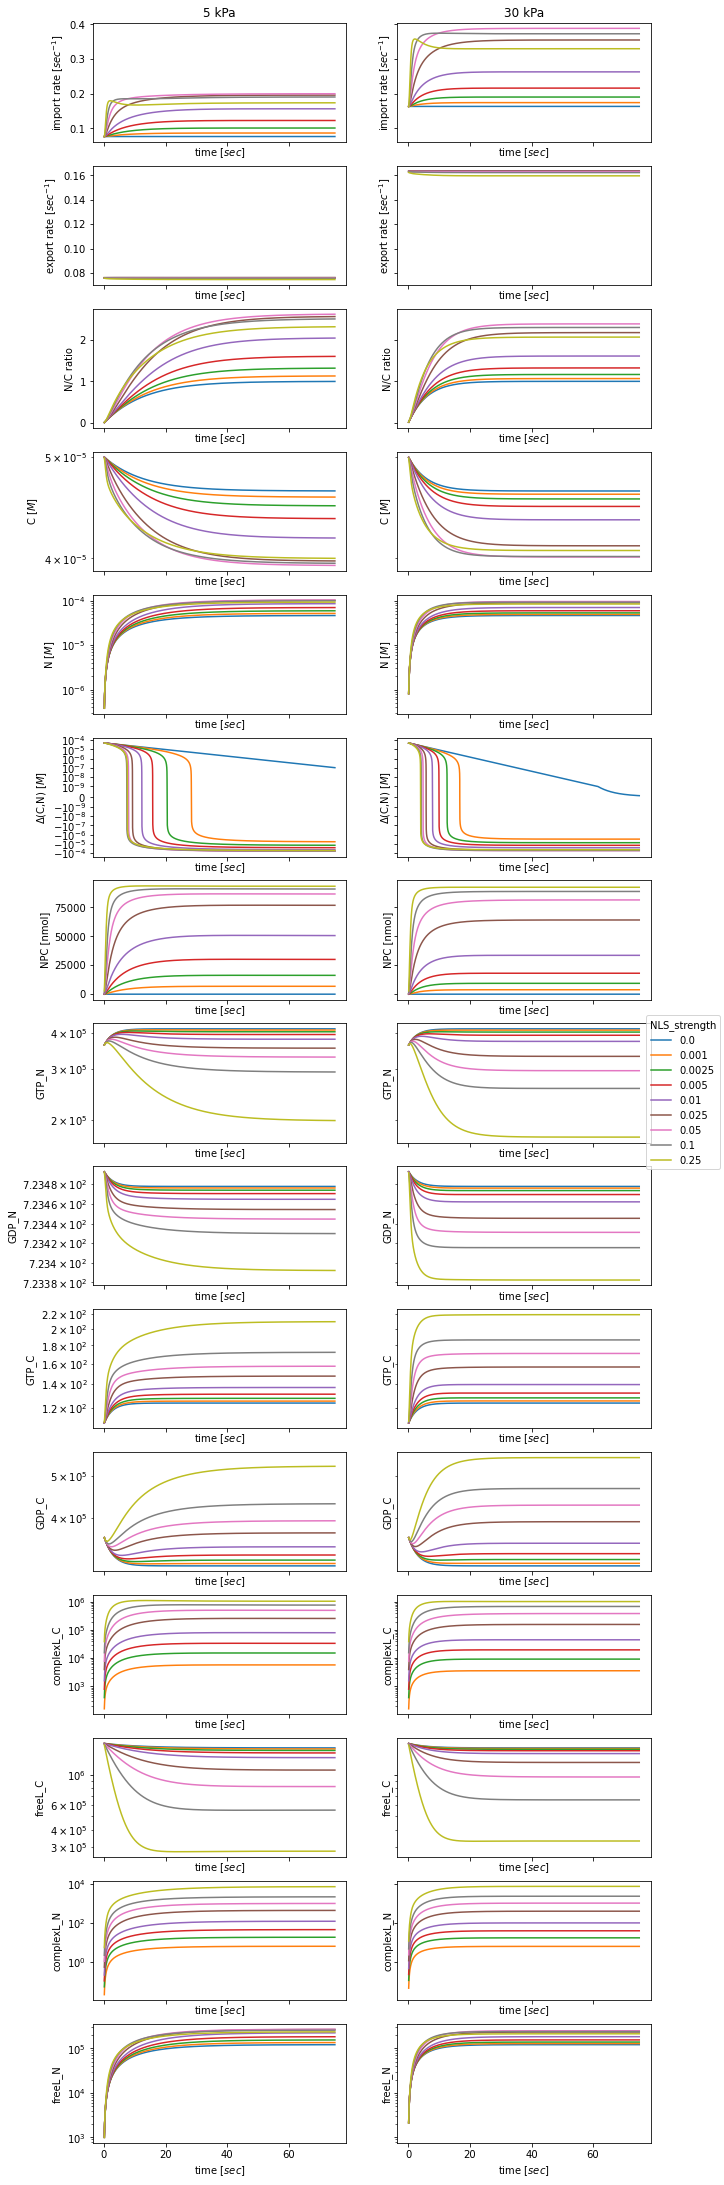

41


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


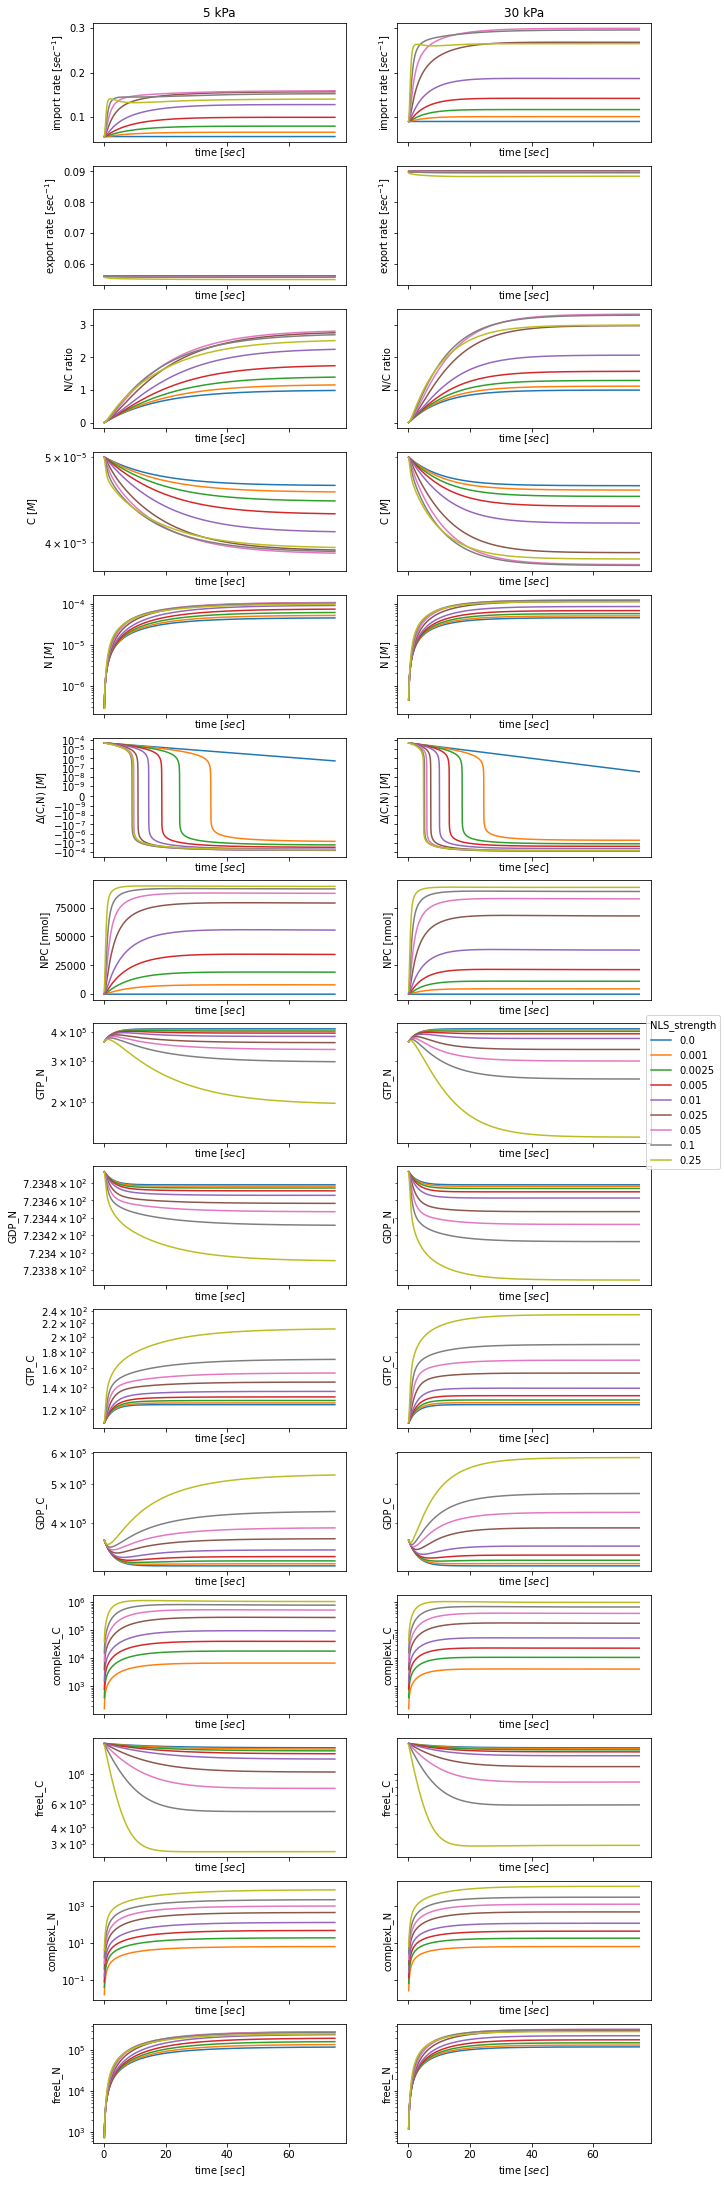

54


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


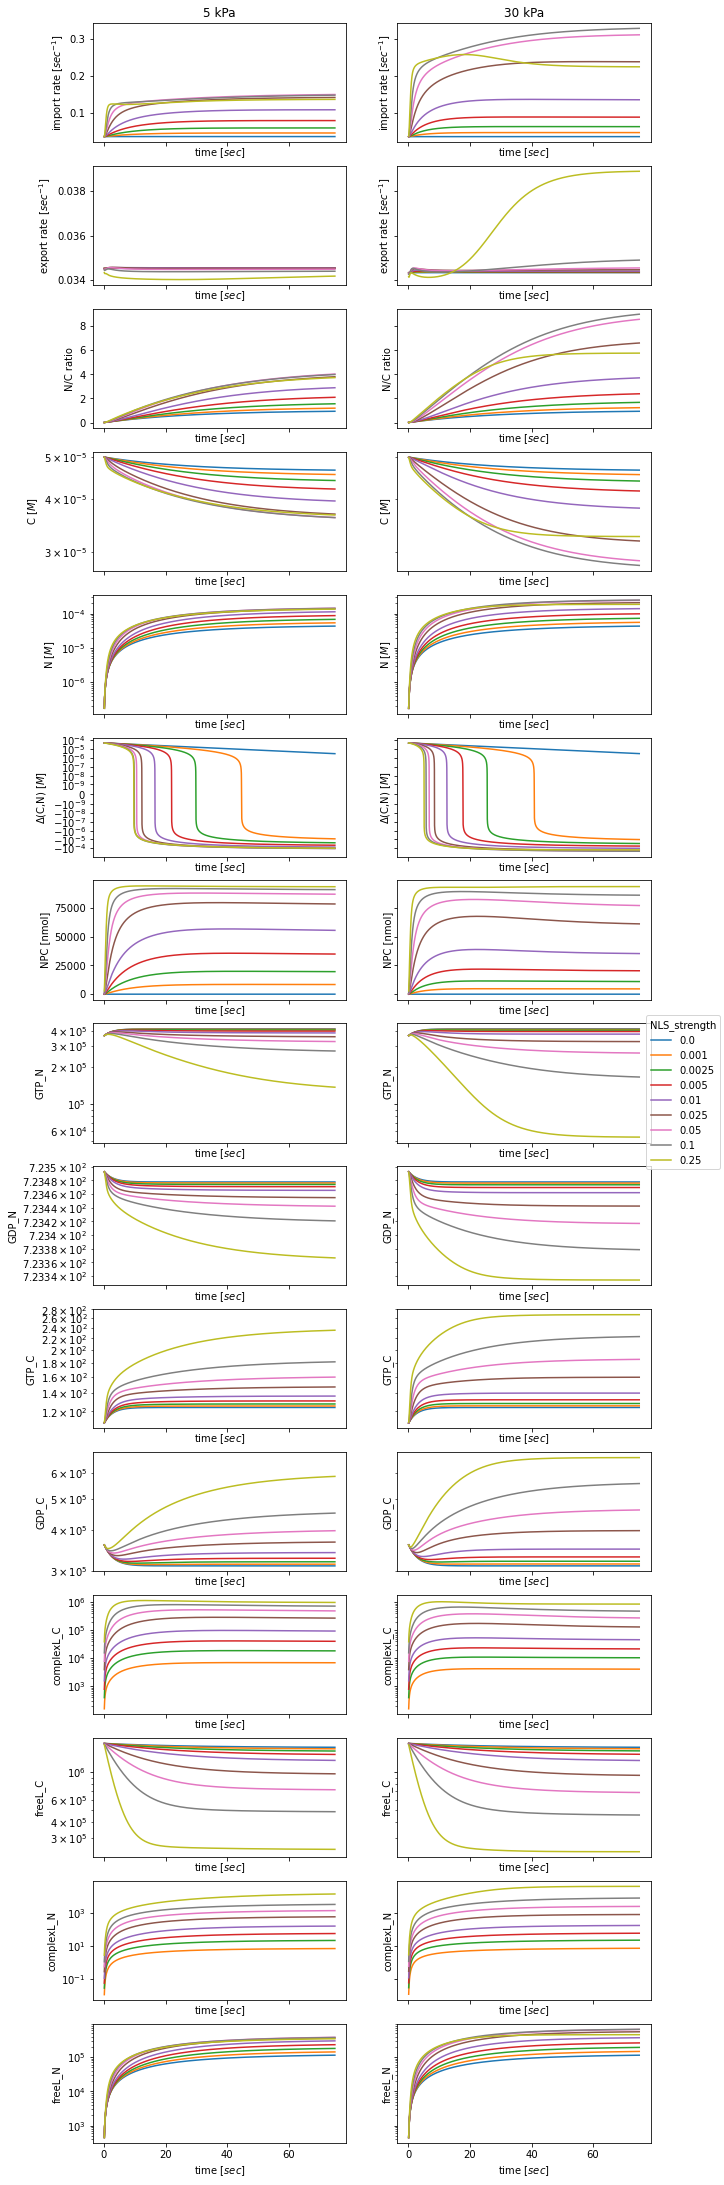

67


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


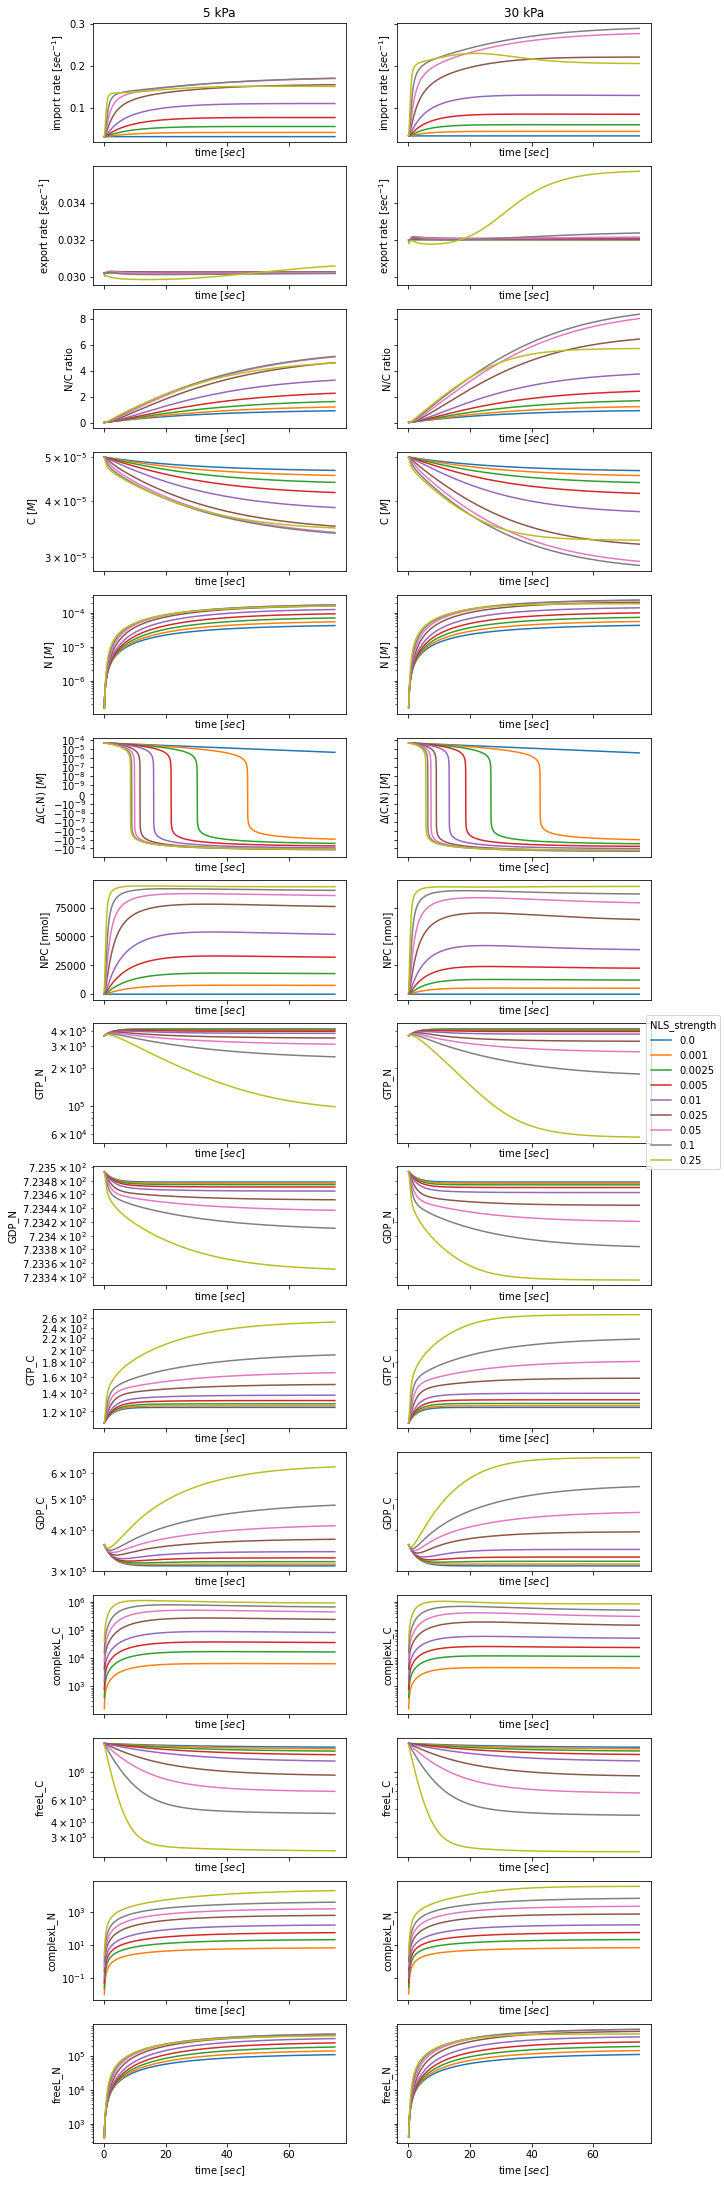

In [108]:
  
for MW in [27, 41, 54, 67]:
    print(MW)
    plot_MW_stats_list(*MW_to_stats_list_by_force[MW])
    plt.show()